In [78]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
%matplotlib inline

<ipython-input-78-4139daf4b17d>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [86]:
consumption = pd.read_csv('C:\\Users\\HP\\Downloads\\hamoye\\dataset\\household_power_consumption.txt',
sep = ';', parse_dates= ['Date'], infer_datetime_format=True, low_memory=False,  na_values=['nan','?'])

ParserError: Error tokenizing data. C error: out of memory

In [5]:
consumption.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
consumption.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


In [8]:
consumption.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
consumption = consumption.dropna()
consumption.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Average consumption of each day in 4 years

In [12]:
mean_consumption_gby_date = consumption.groupby(['Date']).mean()

Text(0.5, 1.0, 'Sub_metering_3')

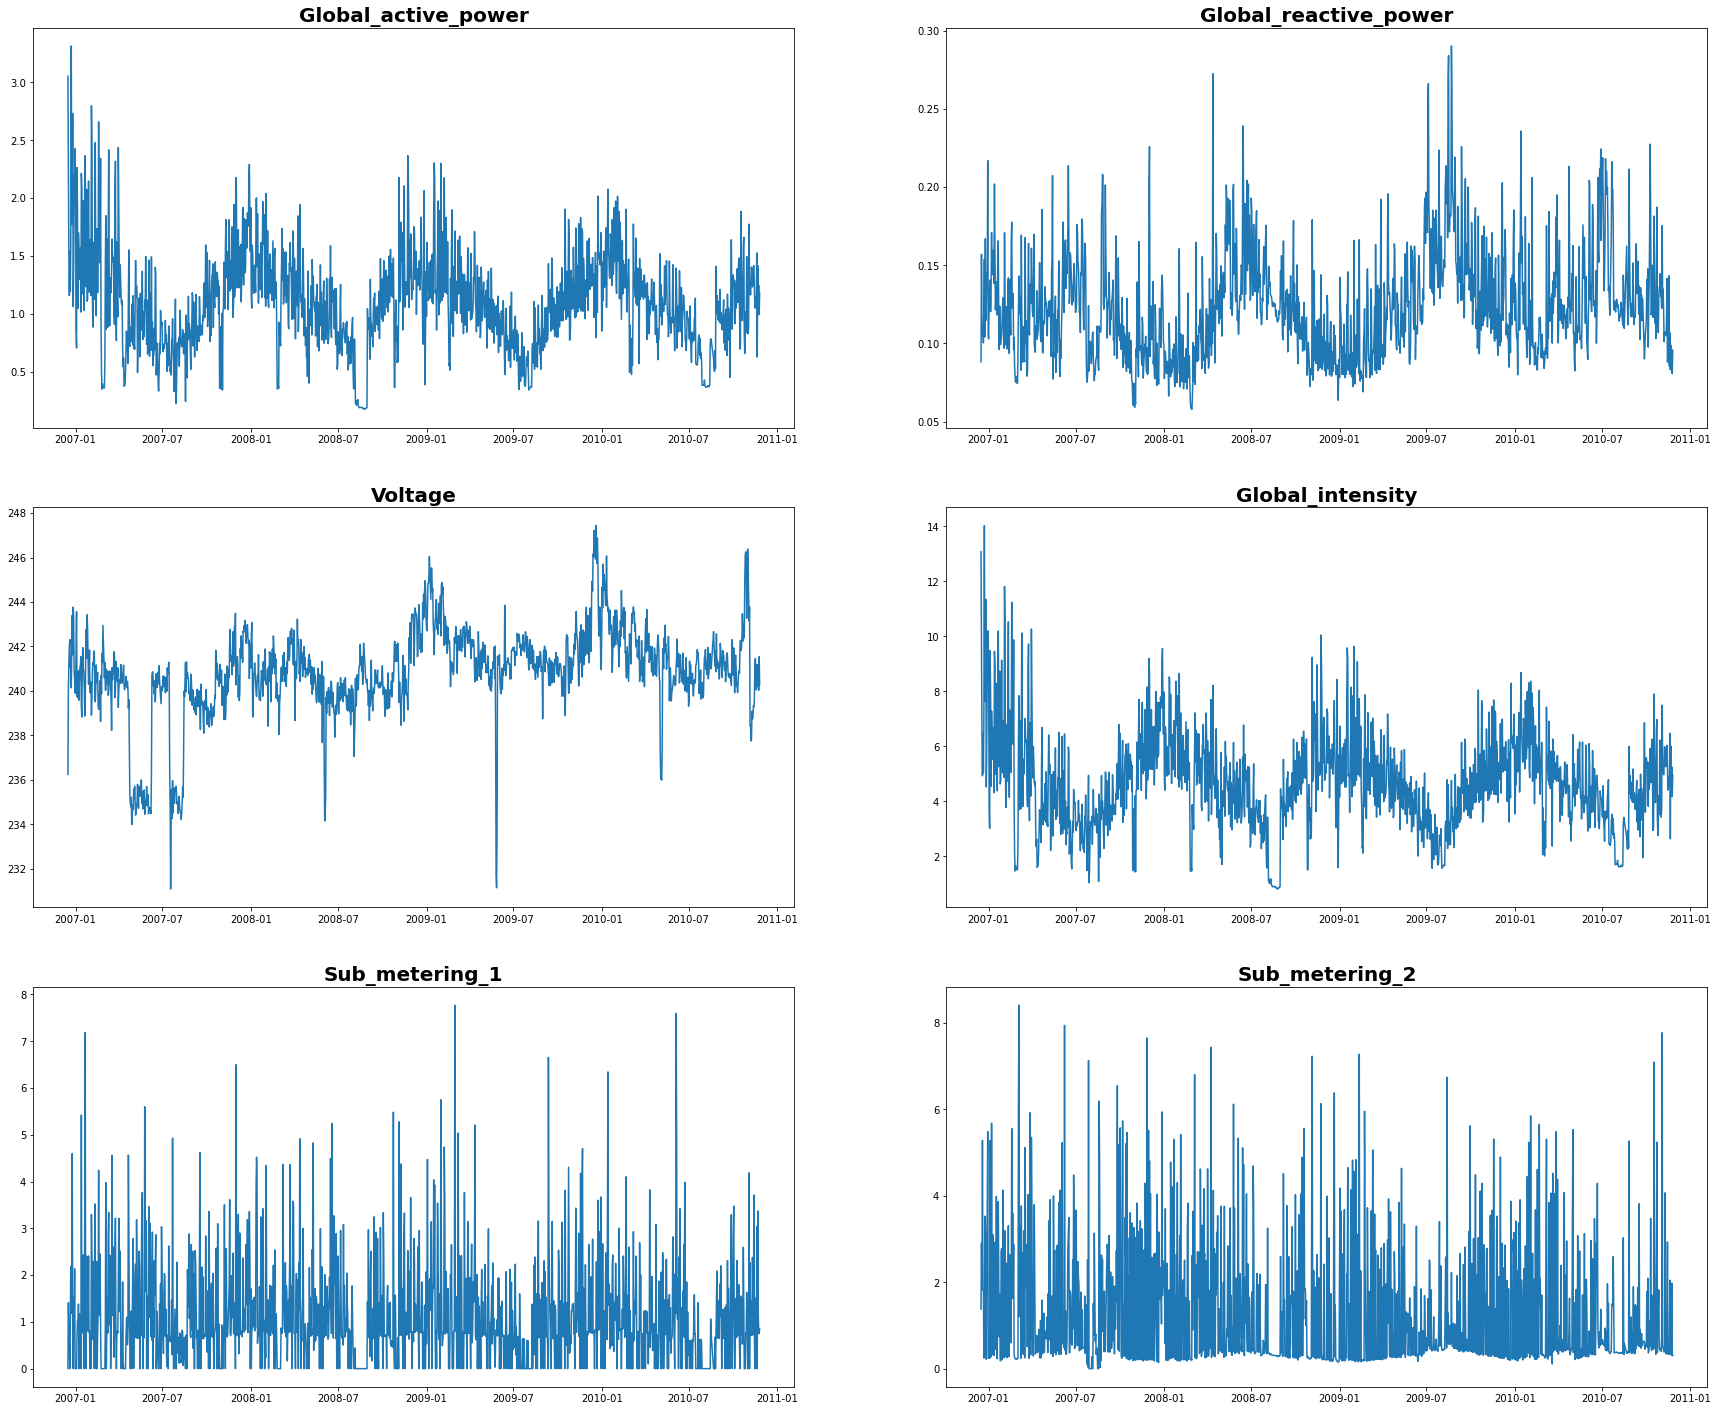

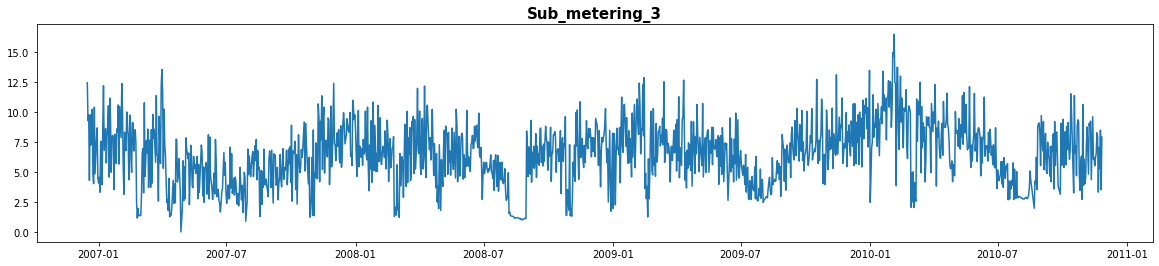

In [14]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns=mean_consumption_gby_date.columns
axs[0, 0].plot(mean_consumption_gby_date[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(mean_consumption_gby_date[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(mean_consumption_gby_date[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(mean_consumption_gby_date[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(mean_consumption_gby_date[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(mean_consumption_gby_date[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig,axs =plt.subplots(figsize=(20,4))
axs.plot(mean_consumption_gby_date[columns[6]])
axs.set_title(columns[6],fontweight='bold',size=15)

Average consumption in each month

In [17]:
mean_consumption_gby_month = consumption.groupby(consumption['Date'].dt.strftime('%B')).mean()
reorderlist = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
mean_consumption_gby_month = mean_consumption_gby_month.reindex(reorderlist)

Text(0.5, 1.0, 'Sub_metering_3')

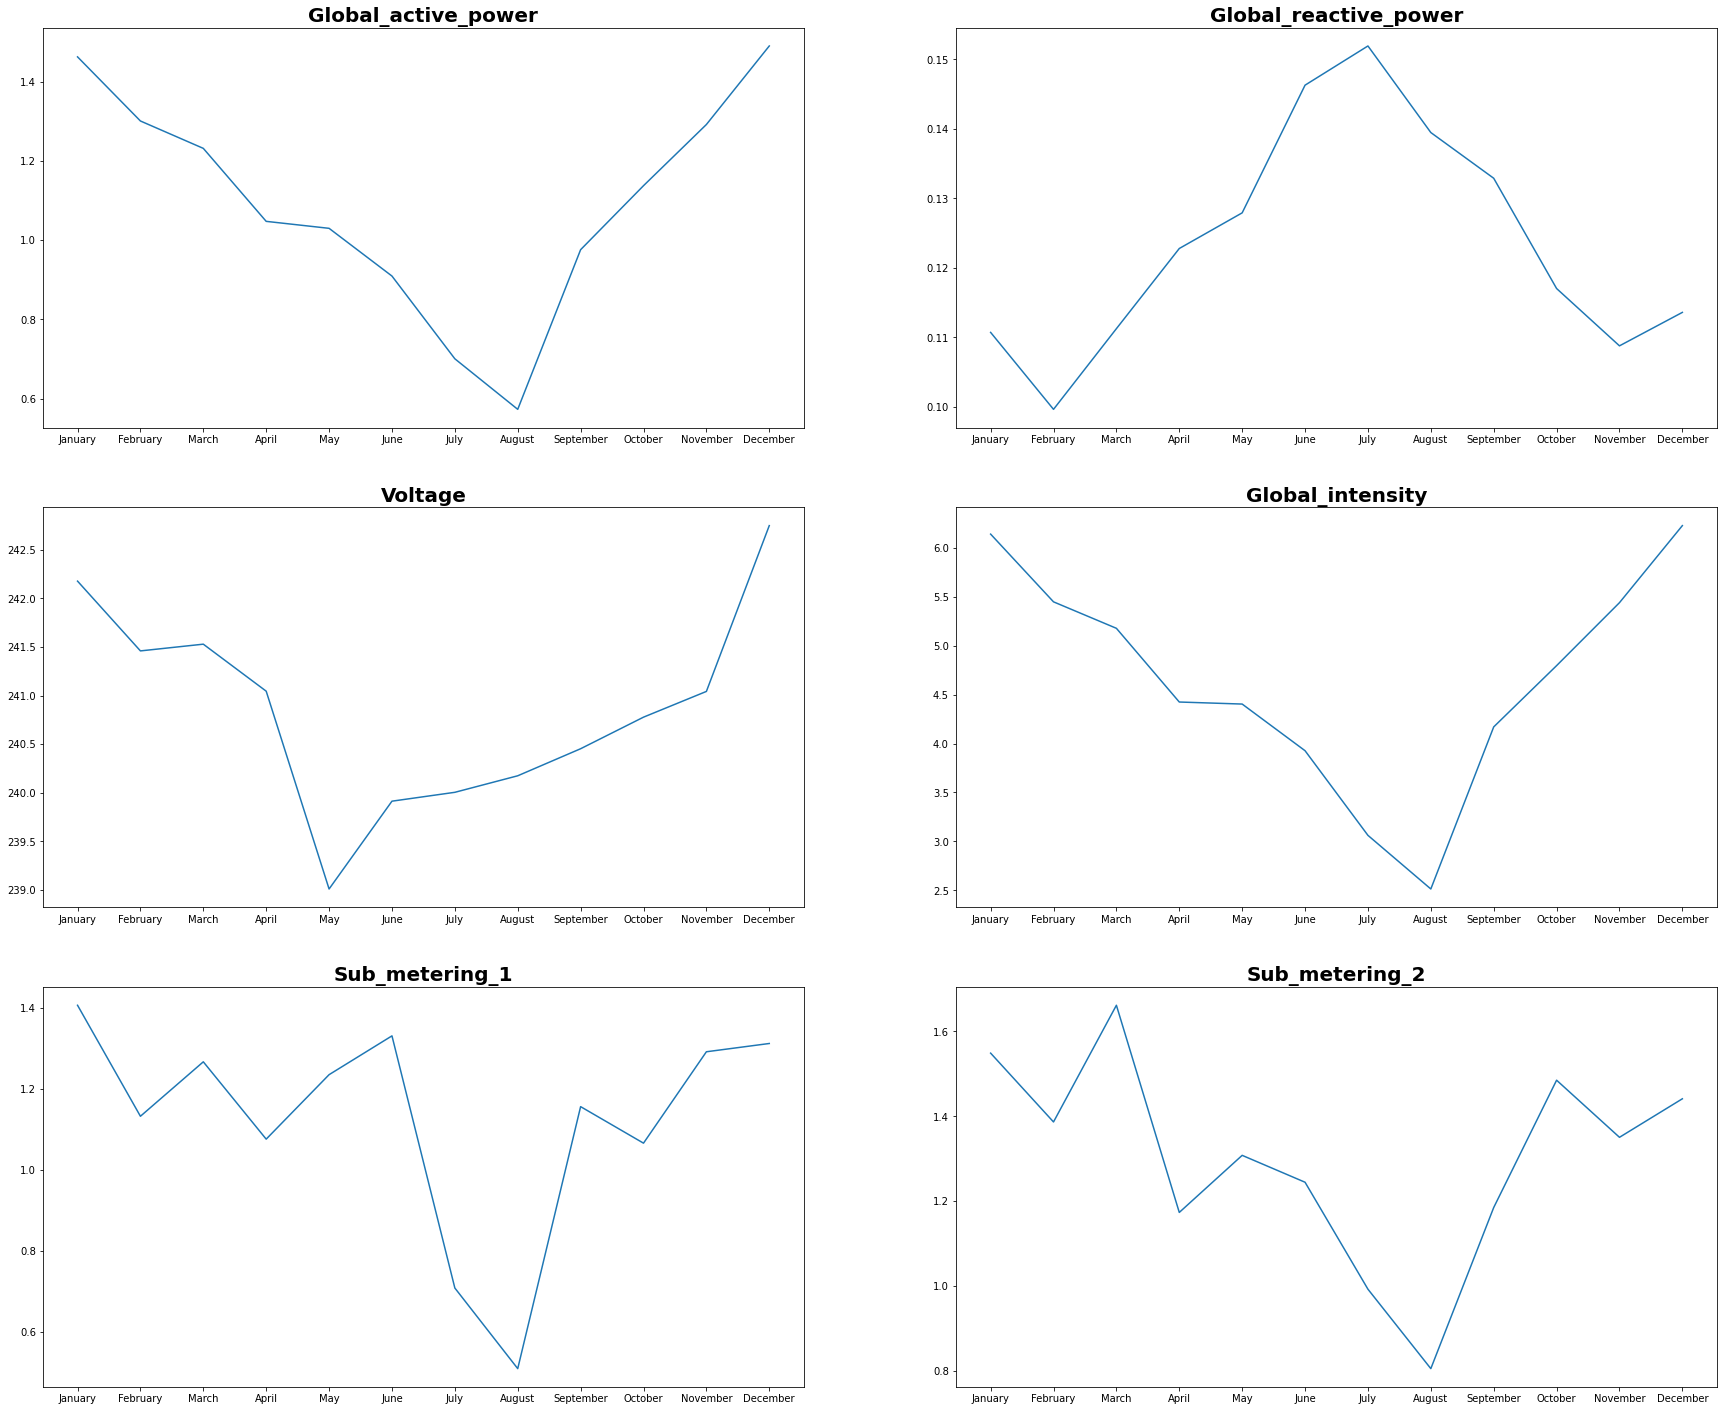

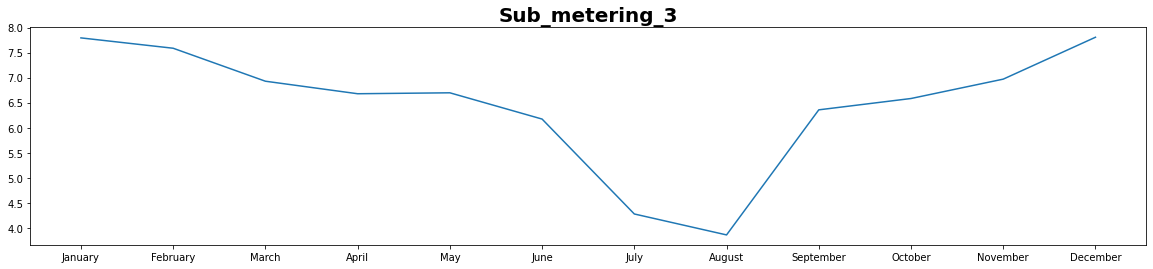

In [22]:
fig,axs =plt.subplots(3,2,figsize=(30,25))
columns=mean_consumption_gby_month.columns
axs[0, 0].plot(mean_consumption_gby_month[columns[0]])
axs[0, 0].set_title(columns[0],fontweight='bold',size=20)

axs[0, 1].plot(mean_consumption_gby_month[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(mean_consumption_gby_month[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(mean_consumption_gby_month[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)


axs[2, 0].plot(mean_consumption_gby_month[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(mean_consumption_gby_month[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig,axs =plt.subplots(figsize=(20,4))
axs.plot(mean_consumption_gby_month[columns[6]])
axs.set_title(columns[6],fontweight='bold',size=20)


2.0

In [34]:
import pandas as pd
import numpy as np
from pandas import datetime as dt
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

<ipython-input-34-bac126825716>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [35]:
consumption_2 = pd.read_csv('C:\\Users\\HP\\Downloads\\hamoye\\dataset\\household_power_consumption.txt',
        sep = ';', parse_dates= {'dt': ['Date','Time']}, infer_datetime_format=True, low_memory=False,  na_values=['nan','?'],index_col='dt')

In [48]:
consumption_2.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Average consumption of each day in a month

In [37]:
mean_consumption_gby_day_month = consumption_2.groupby(consumption_2.index.day).mean()

Text(0.5, 1.0, 'Sub_metering_3')

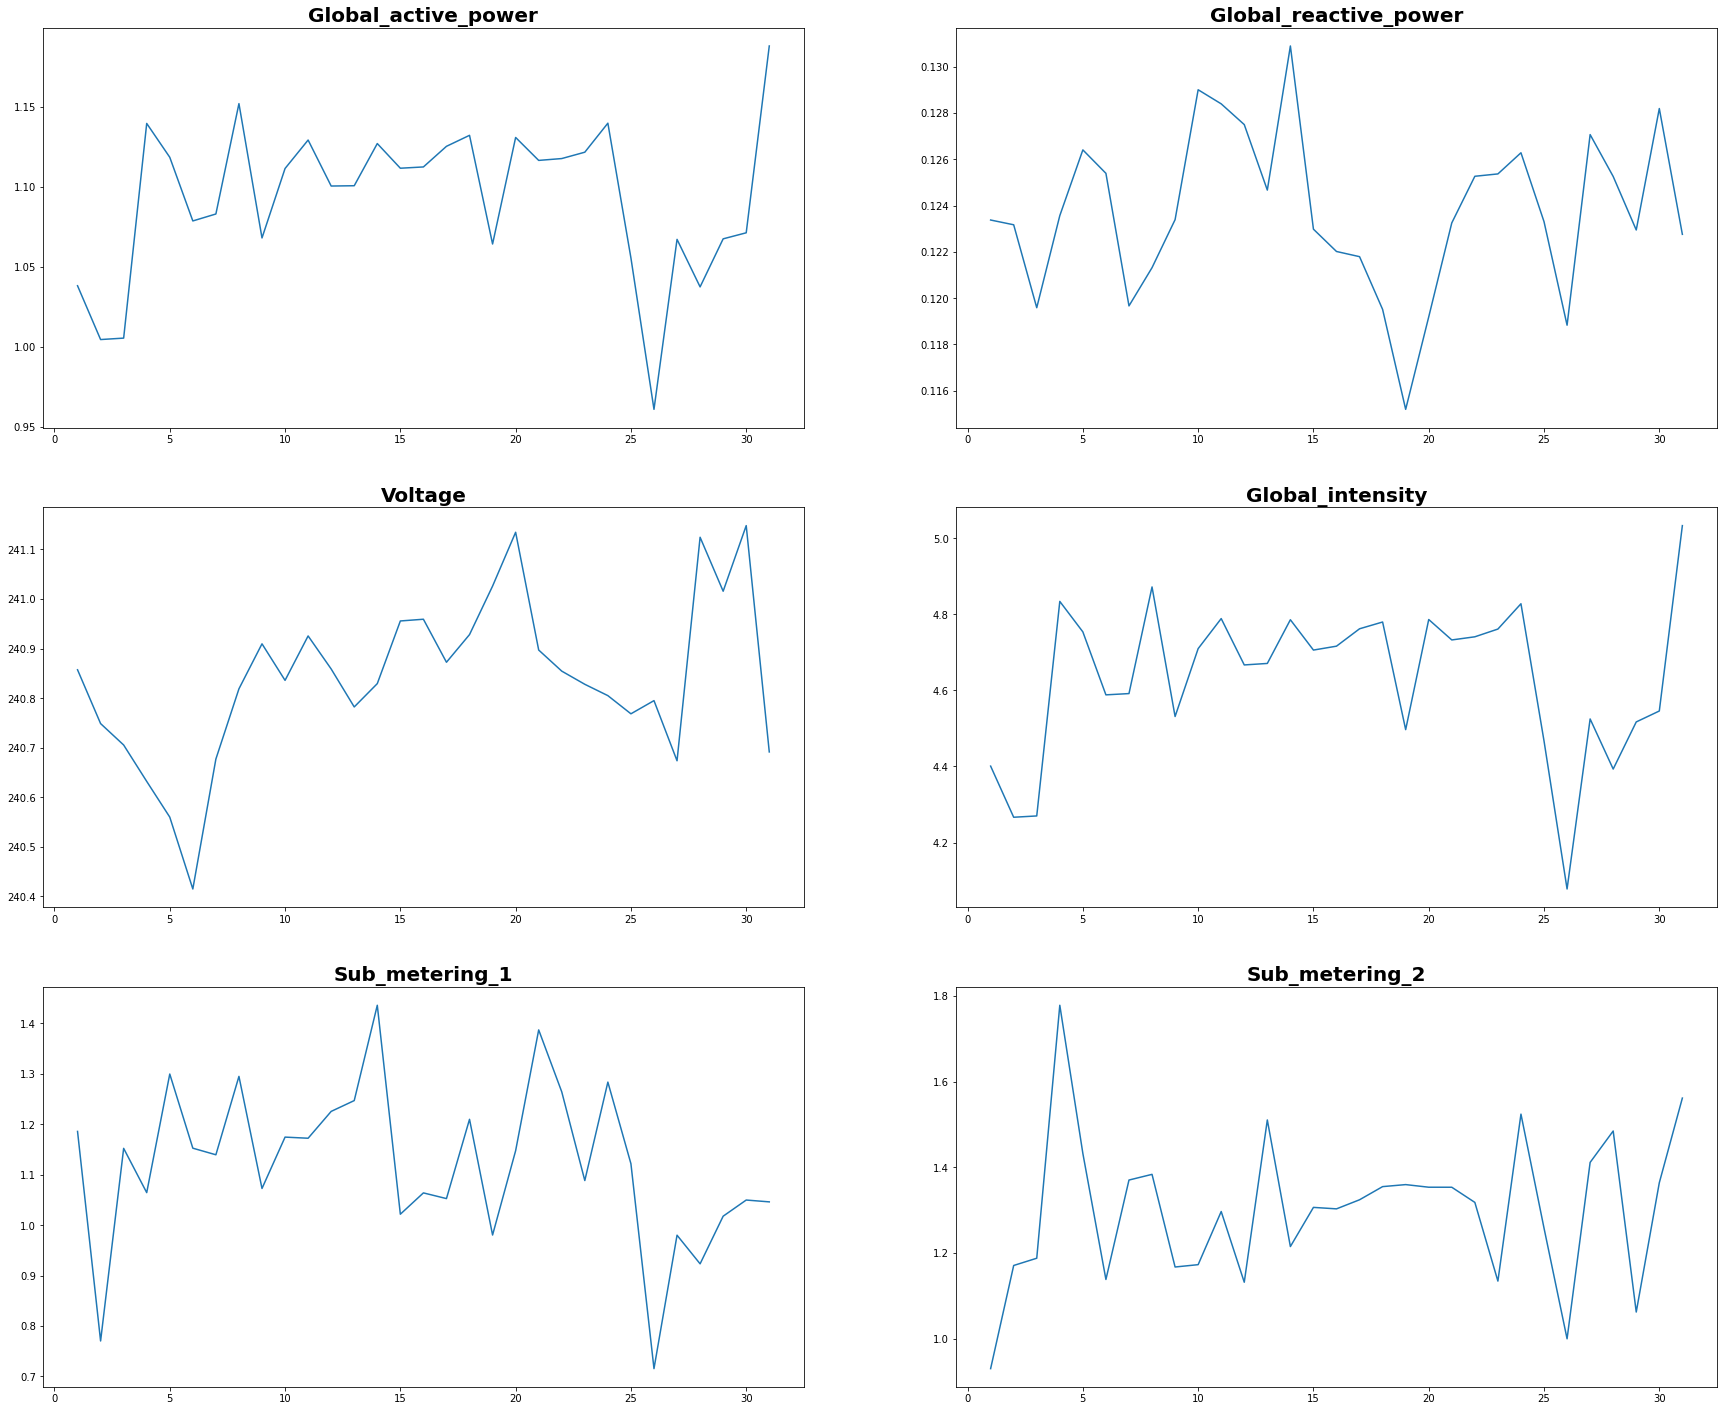

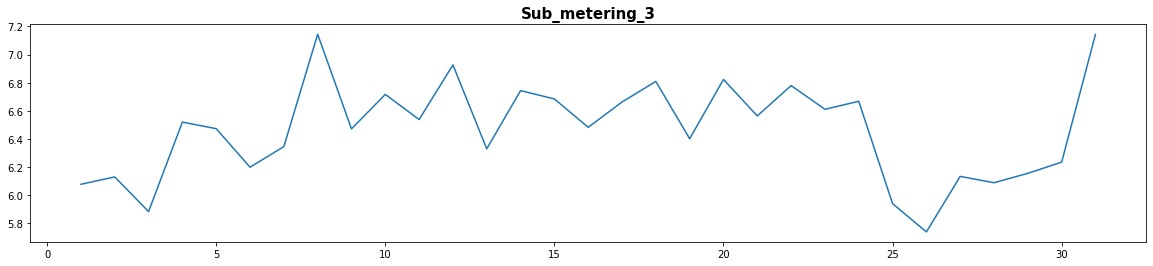

In [38]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = mean_consumption_gby_day_month.columns

axs[0, 0].plot(mean_consumption_gby_day_month[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(mean_consumption_gby_day_month[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(mean_consumption_gby_day_month[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(mean_consumption_gby_day_month[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(mean_consumption_gby_day_month[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(mean_consumption_gby_day_month[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(mean_consumption_gby_day_month[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

Average consumption of each day in a week

In [40]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mean_consumption_gby_day_week = consumption_2.groupby(consumption_2.index.day_name()).mean().reindex(days)

Text(0.5, 1.0, 'Sub_metering_3')

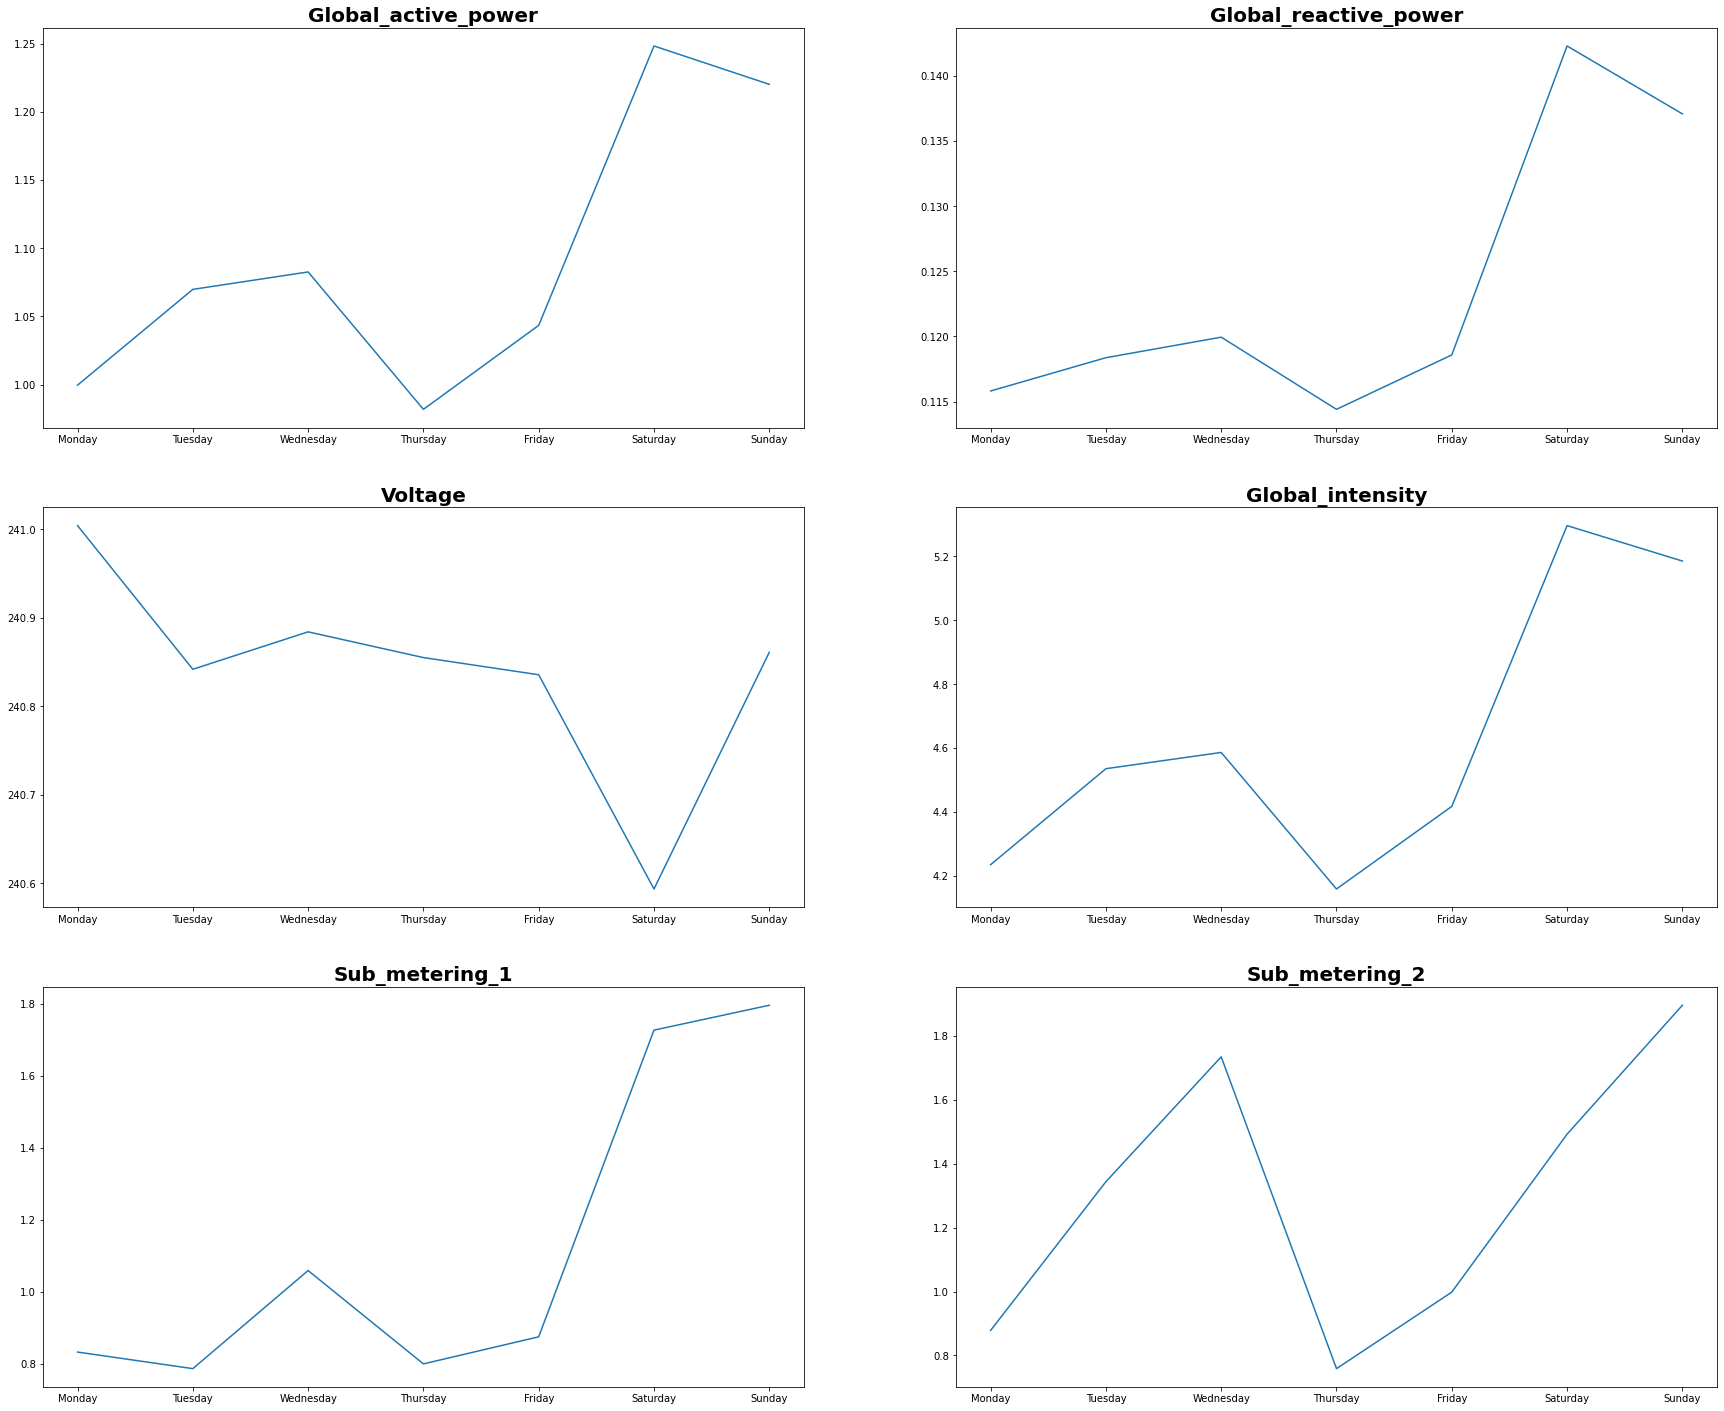

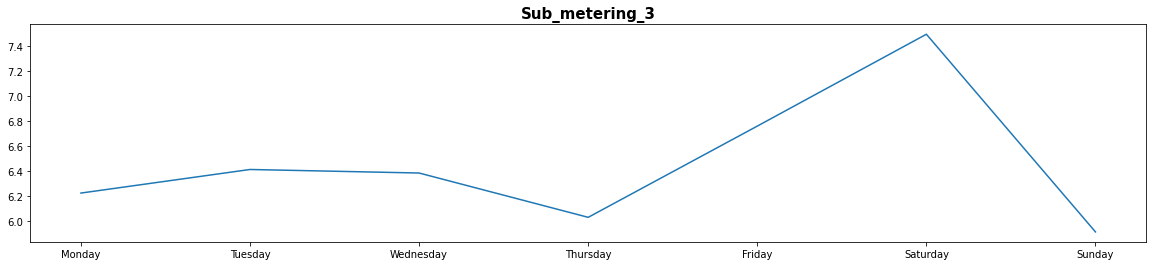

In [42]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = mean_consumption_gby_day_week.columns

axs[0, 0].plot(mean_consumption_gby_day_week[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(mean_consumption_gby_day_week[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(mean_consumption_gby_day_week[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(mean_consumption_gby_day_week[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(mean_consumption_gby_day_week[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(mean_consumption_gby_day_week[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(mean_consumption_gby_day_week[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

Average consumption of each hour in a day

In [44]:
consumption_resampled_in_a_day=consumption_2.resample('H').sum()
consumption_resampled_in_a_day.index=consumption_resampled_in_a_day.index.time
mean_consumption_gby_time=consumption_resampled_in_a_day.groupby(consumption_resampled_in_a_day.index).mean()

Text(0.5, 1.0, 'Sub_metering_3')

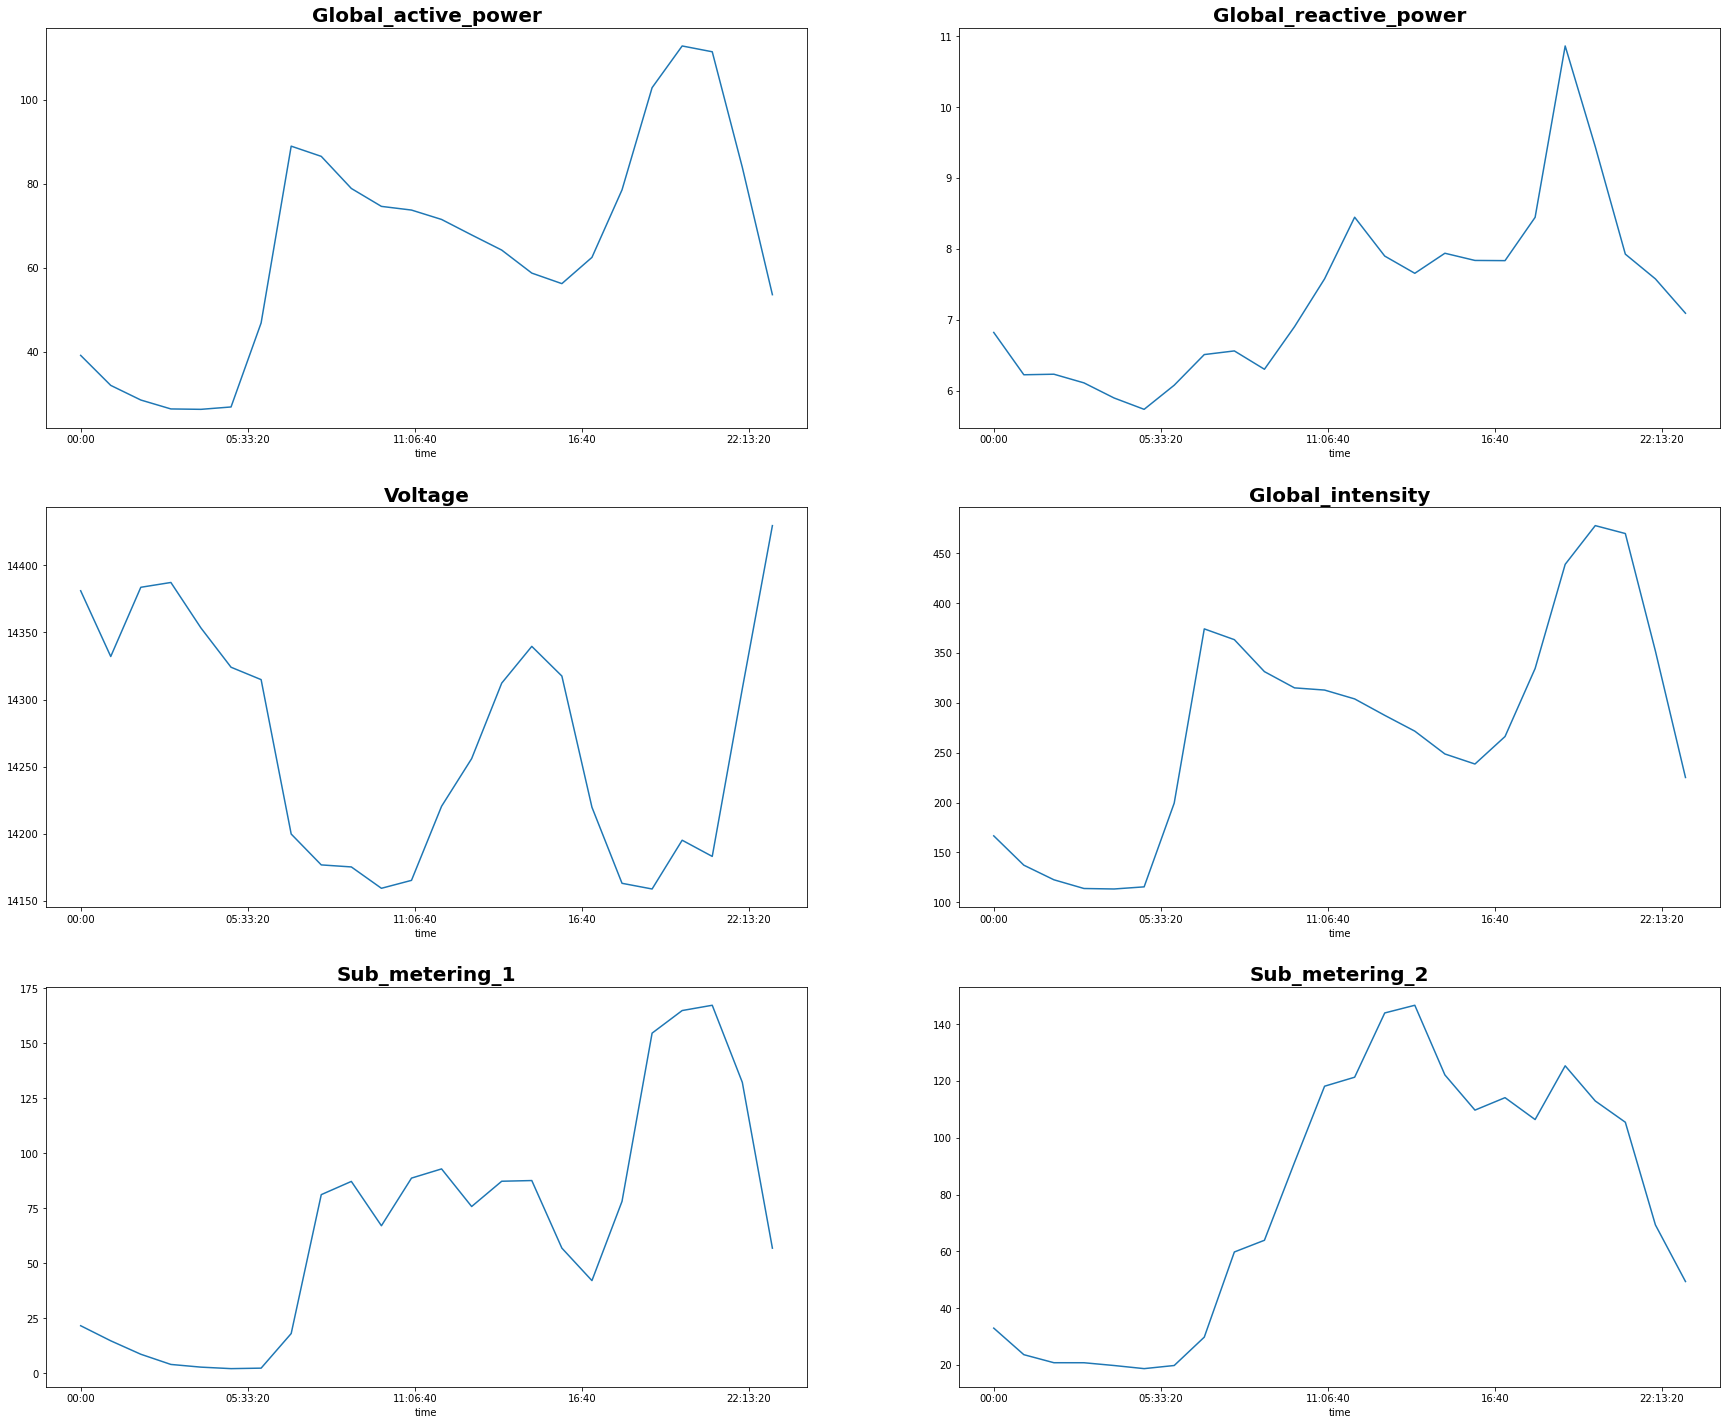

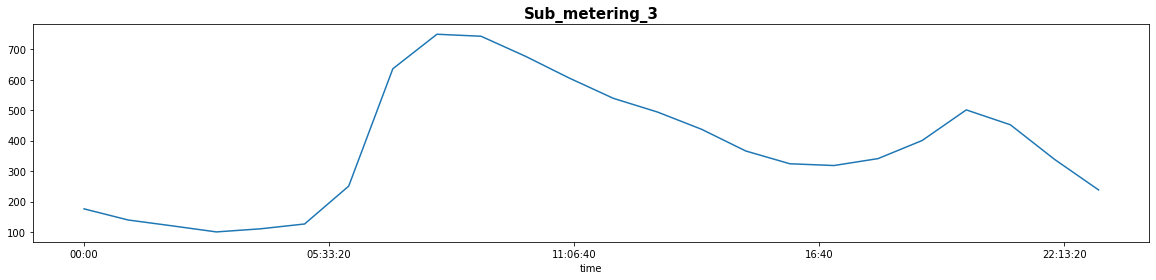

In [45]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = mean_consumption_gby_time.columns

axs[0, 0].plot(mean_consumption_gby_time[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(mean_consumption_gby_time[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(mean_consumption_gby_time[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(mean_consumption_gby_time[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(mean_consumption_gby_time[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(mean_consumption_gby_time[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)
fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(mean_consumption_gby_time[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

Average consumption of each month in 4 years

In [49]:
mean_consumption_resampled_mnthly = consumption_2.resample('M').mean()

Text(0.5, 1.0, 'Sub_metering_3')

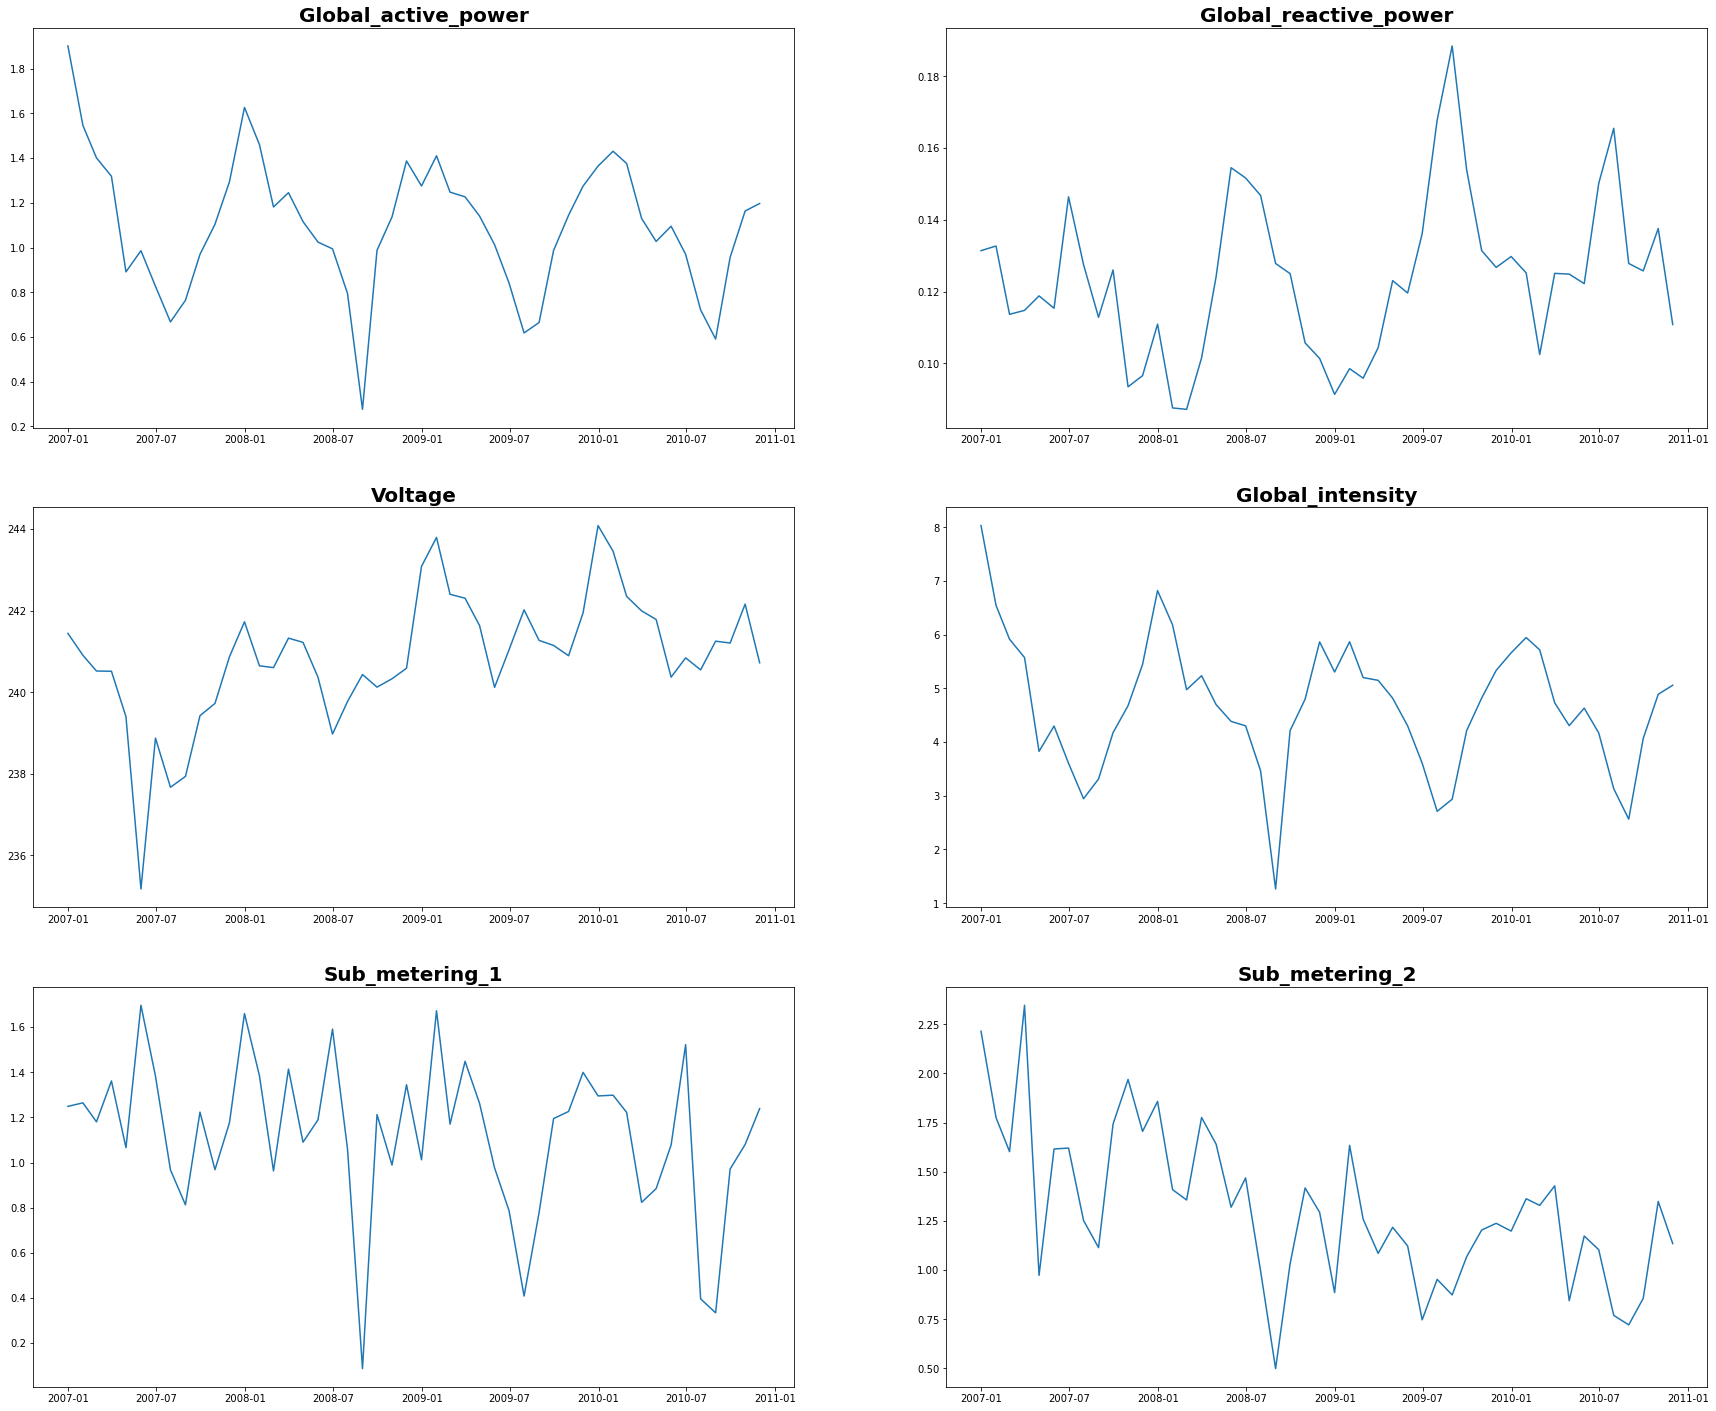

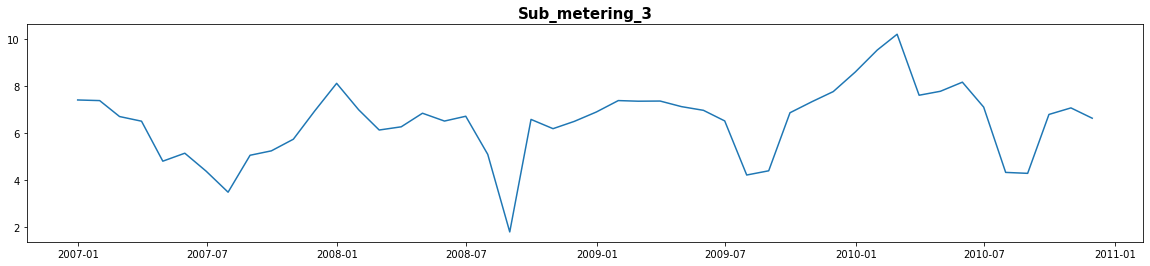

In [50]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = mean_consumption_resampled_mnthly.columns

axs[0, 0].plot(mean_consumption_resampled_mnthly[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(mean_consumption_resampled_mnthly[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(mean_consumption_resampled_mnthly[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(mean_consumption_resampled_mnthly[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(mean_consumption_resampled_mnthly[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(mean_consumption_resampled_mnthly[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)
fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(mean_consumption_resampled_mnthly[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

Augmented Dickey-Fuller Test (ADF Test)/unit root test to check stationarity

In [68]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

In [56]:
adf_test(mean_consumption_resampled_mnthly["Global_active_power"])

Test Statistic          -4.897270
p-value                  0.000035
# Lags                   9.000000
# Observations          38.000000
Critical Value (1%)     -3.615509
Critical Value (5%)     -2.941262
Critical Value (10%)    -2.609200
dtype: float64
 Series is Stationary


In [57]:
adf_test(mean_consumption_resampled_mnthly["Global_reactive_power"])

Test Statistic          -3.951475
p-value                  0.001687
# Lags                   3.000000
# Observations          44.000000
Critical Value (1%)     -3.588573
Critical Value (5%)     -2.929886
Critical Value (10%)    -2.603185
dtype: float64
 Series is Stationary


In [58]:
adf_test(mean_consumption_resampled_mnthly['Voltage'])

Test Statistic          -2.534397
p-value                  0.107328
# Lags                   1.000000
# Observations          46.000000
Critical Value (1%)     -3.581258
Critical Value (5%)     -2.926785
Critical Value (10%)    -2.601541
dtype: float64
 Series is Non-Stationary


In [59]:
adf_test(mean_consumption_resampled_mnthly['Global_intensity'])

Test Statistic         -6.054392e+00
p-value                 1.255263e-07
# Lags                  7.000000e+00
# Observations          4.000000e+01
Critical Value (1%)    -3.605565e+00
Critical Value (5%)    -2.937069e+00
Critical Value (10%)   -2.606986e+00
dtype: float64
 Series is Stationary


In [60]:
adf_test(mean_consumption_resampled_mnthly['Sub_metering_1'])

Test Statistic          -5.385093
p-value                  0.000004
# Lags                   0.000000
# Observations          47.000000
Critical Value (1%)     -3.577848
Critical Value (5%)     -2.925338
Critical Value (10%)    -2.600774
dtype: float64
 Series is Stationary


In [61]:
adf_test(mean_consumption_resampled_mnthly['Sub_metering_2'])

Test Statistic          -4.583647
p-value                  0.000138
# Lags                   0.000000
# Observations          47.000000
Critical Value (1%)     -3.577848
Critical Value (5%)     -2.925338
Critical Value (10%)    -2.600774
dtype: float64
 Series is Stationary


In [62]:
adf_test(mean_consumption_resampled_mnthly['Sub_metering_3'])

Test Statistic          -3.354857
p-value                  0.012598
# Lags                   0.000000
# Observations          47.000000
Critical Value (1%)     -3.577848
Critical Value (5%)     -2.925338
Critical Value (10%)    -2.600774
dtype: float64
 Series is Stationary


Differencing to remove non-stationarity

In [64]:
def difference(dataset,interval=1):
    diff=list()
    diff.append(0)
    for i in range(interval,len(dataset)):
        value=dataset[i] -dataset[i - interval]
        diff.append(value)
    return diff
mean_consumption_resampled_mnthly['Voltage']=difference(mean_consumption_resampled_mnthly['Voltage'])

In [65]:
adf_test(mean_consumption_resampled_mnthly['Voltage'])

Test Statistic          -5.438533
p-value                  0.000003
# Lags                   3.000000
# Observations          44.000000
Critical Value (1%)     -3.588573
Critical Value (5%)     -2.929886
Critical Value (10%)    -2.603185
dtype: float64
 Series is Stationary


VAR model

In [66]:
model=VAR(mean_consumption_resampled_mnthly)
model_fit= model.fit()
pred=model_fit.forecast(model_fit.y,steps=4)

c:\users\hp\downloads\python\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


# section 2 IMPORTANT

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
%matplotlib inline
import seaborn as sns

<ipython-input-2-107e90a28ebb>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
dataset = pd.read_csv("C:\\Users\\HP\\Downloads\\hamoye\\dataset\\household_power_consumption.txt", sep=';', header=0, infer_datetime_format=True, 
                      parse_dates={'datetime':[0,1]}, index_col=['datetime'])

c:\users\hp\downloads\python\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
print(f"The Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

The Dataset has 2075259 rows and 7 columns


In [5]:
dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
percent_missing=dataset.isnull().sum() * 100/ len(dataset)
missing_value_df=pd.DataFrame({'Percent_missing': percent_missing})

In [7]:
missing_value_df

,Percent_missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [8]:
dataset1 = dataset.dropna(how = 'any')

In [9]:
dataset1.shape

(2049280, 7)

In [10]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [11]:
dataset.replace('?', np.nan, inplace=True)

In [12]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataset = dataset.dropna(how = 'all')

In [14]:
for i in dataset.columns:
    dataset[i] = dataset[i].astype('float64')
#dataset = dataset.astype('float32')

In [15]:
dataset.shape

(2049280, 7)

In [16]:
values=dataset.values
dataset['sub_metering_4']=(values[:,0] * 1000 / 60) - (values[:,4] + values[:,5]+ values[:,6])

In [17]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object

In [18]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


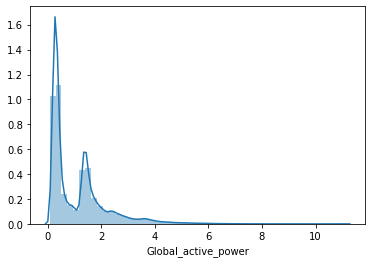

In [19]:
sns.distplot(dataset['Global_active_power'])

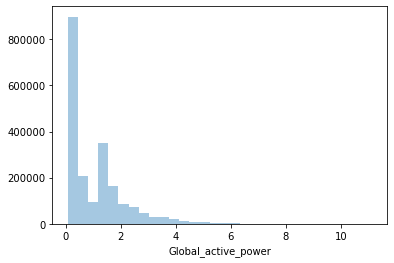

In [20]:
sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

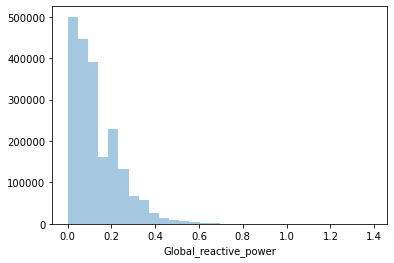

In [21]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

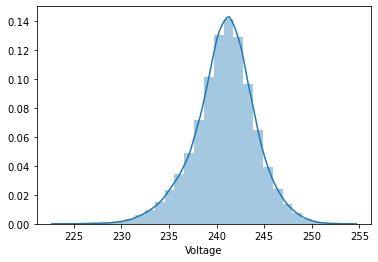

In [22]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

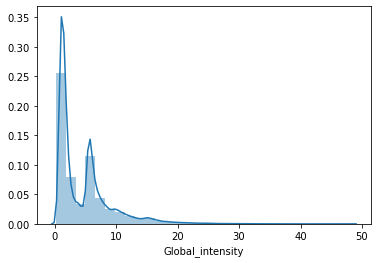

In [23]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

In [77]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


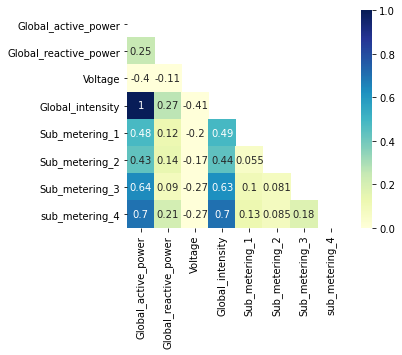

In [25]:
pearson = dataset.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

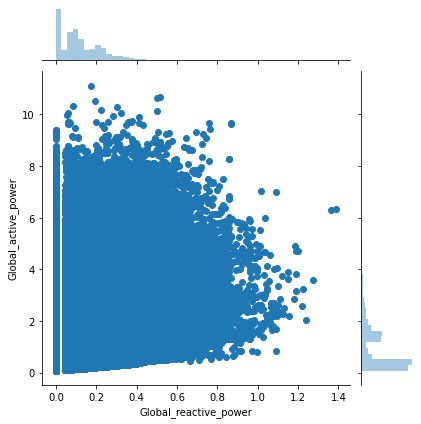

In [26]:
sns.jointplot( x = 'Global_reactive_power' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

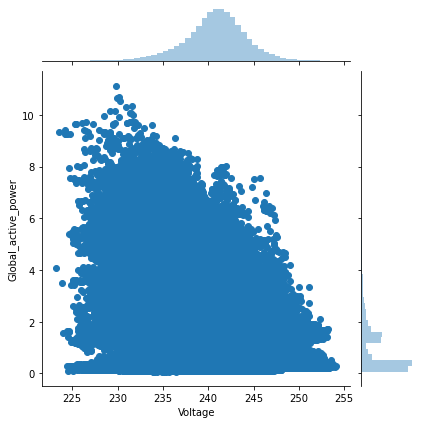

In [27]:
sns.jointplot( x = 'Voltage' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

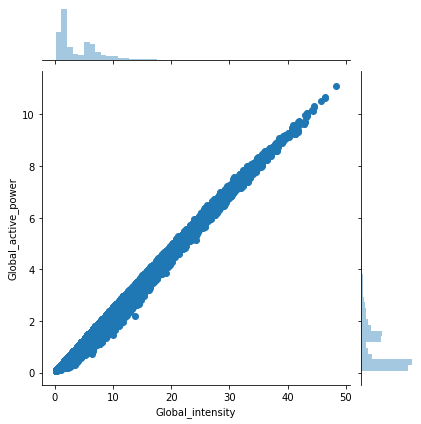

In [28]:
sns.jointplot( x = 'Global_intensity' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

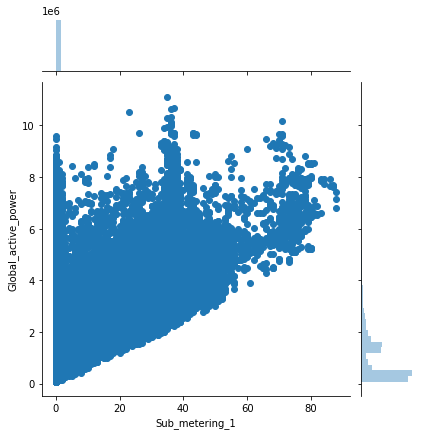

In [29]:
sns.jointplot( x = 'Sub_metering_1' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

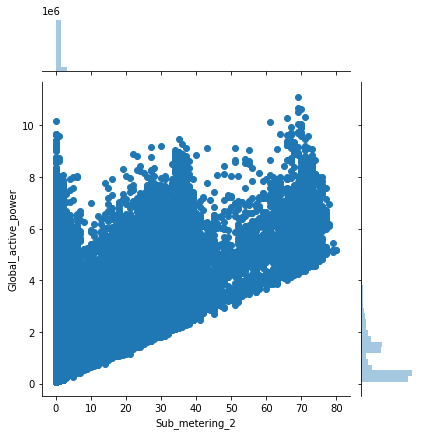

In [30]:
sns.jointplot( x = 'Sub_metering_2' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

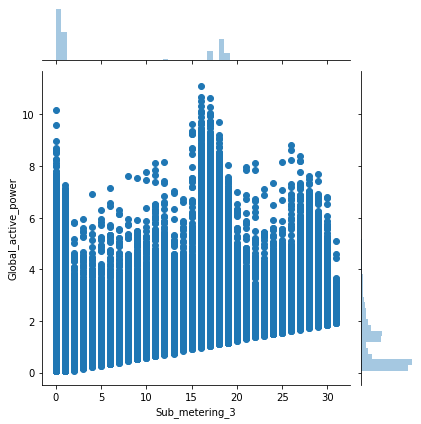

In [31]:
sns.jointplot( x = 'Sub_metering_3' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

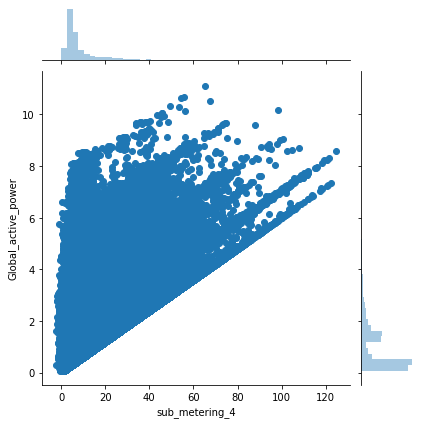

In [32]:
sns.jointplot( x = 'sub_metering_4' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

In [33]:
X = dataset.iloc[:,[1,3,4,5,6]]
y = dataset.iloc[:,0]

In [34]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


In [48]:
y.head()

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1434496, 5)
(614784, 5)
(1434496,)
(614784,)


In [54]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [55]:
print('Coefficient: \n',lm.coef_)

Coefficient: 
 [-0.17597046  0.23668058 -0.00029877 -0.00040084  0.00216141]


In [56]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

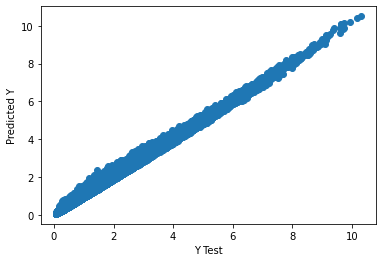

In [57]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [59]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R squared value:',metrics.r2_score(y_test,predictions))

MAE: 0.027455608456437318
MSE: 0.0018226463072696989
RMSE: 0.0426924619490338
R squared value: 0.9983631695586828


In [61]:
from sklearn.linear_model import Lasso

In [63]:
best_alpha=0.00099
regr=Lasso(alpha=best_alpha,max_iter=50000)
regr.fit(X_train,y_train)
lasso_pred=regr.predict(X_test)

In [66]:
print('MAE:',metrics.mean_absolute_error(y_test,lasso_pred))
print('MSE:',metrics.mean_squared_error(y_test,lasso_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))
print('R squared value:',metrics.r2_score(y_test,lasso_pred))

MAE: 0.028482486702148698
MSE: 0.0019093956261286766
RMSE: 0.043696631748095606
R squared value: 0.9982852641936618
